<a href="https://colab.research.google.com/github/Edward1304/Signals-Theory-Edward/blob/main/NN_MLP/Estimate_PSD_NN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoria de Señales  2024-1
## Edward Fabian Goyeneche Velandia -Ingenieria Electronica.
### Universidad Nacional de Colombia - Sede Manizales.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.neural_network import MLPRegressor
from scipy. signal import welch


### Señal  Original  $\frac{1}{3}$

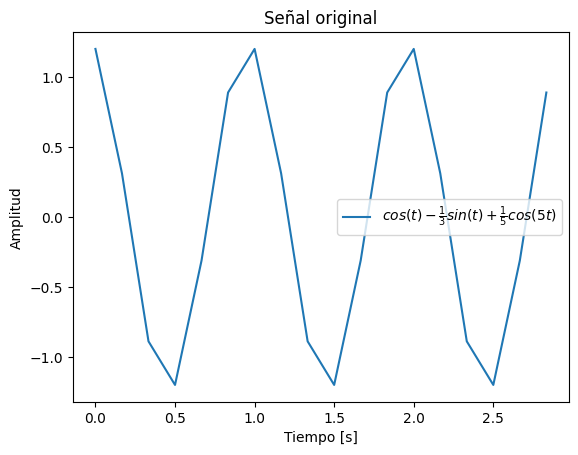

In [2]:
import numpy as np

# Generar la señal original
def generate_original_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(w * t) + (1/5) * np.cos(5 * w * t)
    return signal

fs = 600
T = 3
w = 2 * np.pi
t = np.linspace(0, T, int(fs * T), endpoint=False)

original_signal = generate_original_signal(w, t)


plt.plot(t, original_signal)
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])
plt.show()



### Matriz de la señal con distinto Ruido Blanco Gaussiano

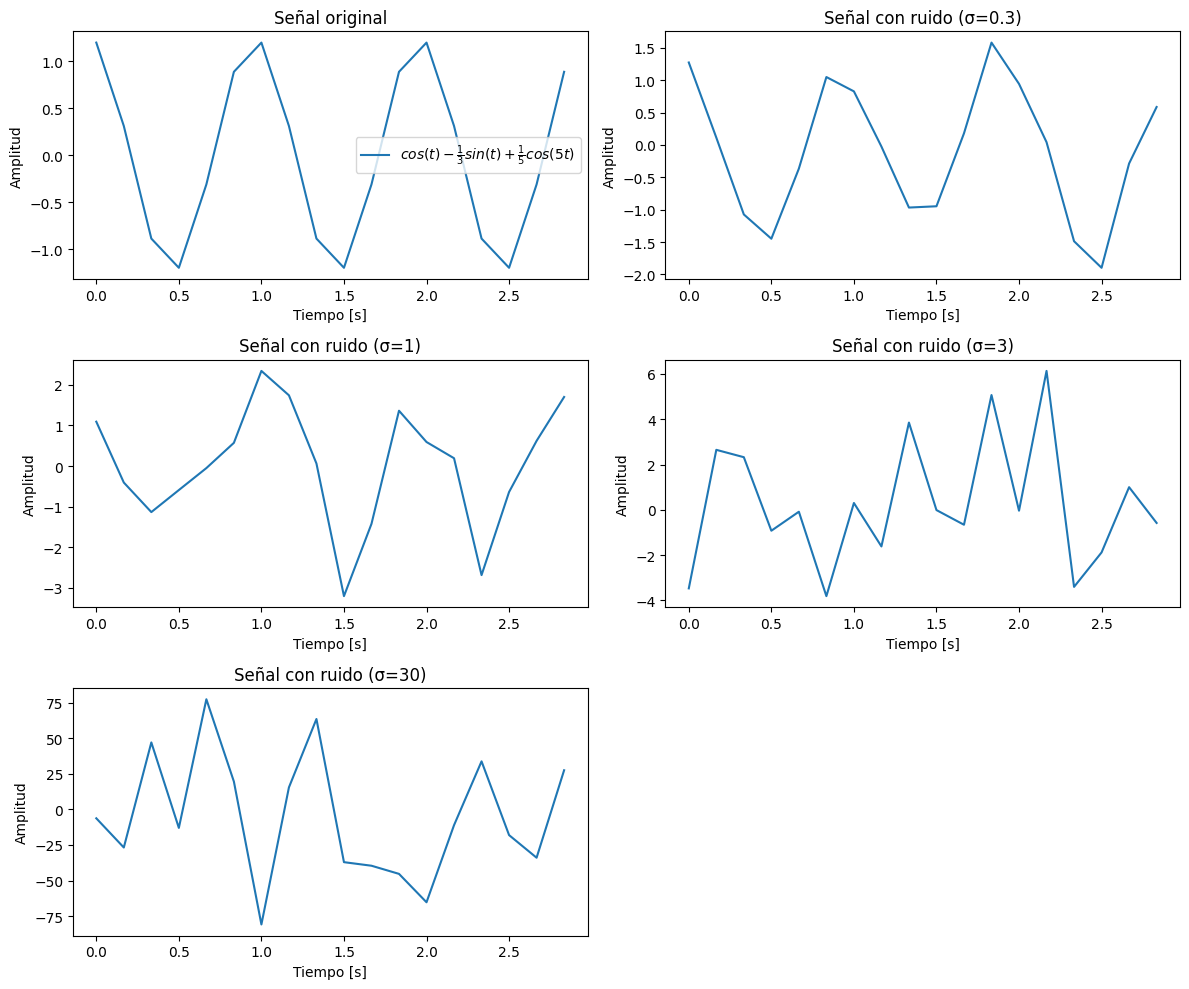

[[ 1.20000000e+00  3.11324865e-01 -8.88675135e-01 -1.20000000e+00
  -3.11324865e-01  8.88675135e-01  1.20000000e+00  3.11324865e-01
  -8.88675135e-01 -1.20000000e+00 -3.11324865e-01  8.88675135e-01
   1.20000000e+00  3.11324865e-01 -8.88675135e-01 -1.20000000e+00
  -3.11324865e-01  8.88675135e-01]
 [ 1.27321066e+00  1.13168820e-01 -1.07286592e+00 -1.44770244e+00
  -3.65355608e-01  1.04858803e+00  8.27340399e-01 -2.45923358e-02
  -9.66555183e-01 -9.46665219e-01  1.79036536e-01  1.58028433e+00
   9.42786576e-01  4.29602289e-02 -1.48653211e+00 -1.89657915e+00
  -2.86815105e-01  5.86000341e-01]
 [ 1.09046020e+00 -4.06160800e-01 -1.13306550e+00 -5.91104972e-01
  -5.09056789e-02  5.70407202e-01  2.33900121e+00  1.73929004e+00
   6.23222520e-02 -3.20008325e+00 -1.42209707e+00  1.36025749e+00
   5.90594845e-01  1.91657096e-01 -2.68286646e+00 -6.38697631e-01
   6.19054616e-01  1.69819296e+00]
 [-3.47450429e+00  2.64811043e+00  2.32290092e+00 -9.26128178e-01
  -8.66516370e-02 -3.81650216e+00  2.

In [3]:

noise_levels=[ 0.3,1,3,30]

signal_matrix = np.zeros((len(noise_levels),+1, len(t)))
signal_matrix[0,:]= original_signal



signals_matrix = np.zeros((len(noise_levels) + 1, len(t)))
signals_matrix[0, :] = original_signal

# Añadir ruido y almacenar en la matriz
for i, noise_level in enumerate(noise_levels):
    noisy_signal = original_signal + np.random.normal(0, noise_level, original_signal.shape)
    signals_matrix[i + 1, :] = noisy_signal


plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.plot(t, signals_matrix[0, :])
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])

for i, noise_level in enumerate(noise_levels):
    plt.subplot(3, 2, i + 2)
    plt.plot(t, signals_matrix[i + 1, :])
    plt.title(f"Señal con ruido (σ={noise_level})")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print (signals_matrix)
print (signals_matrix.shape)



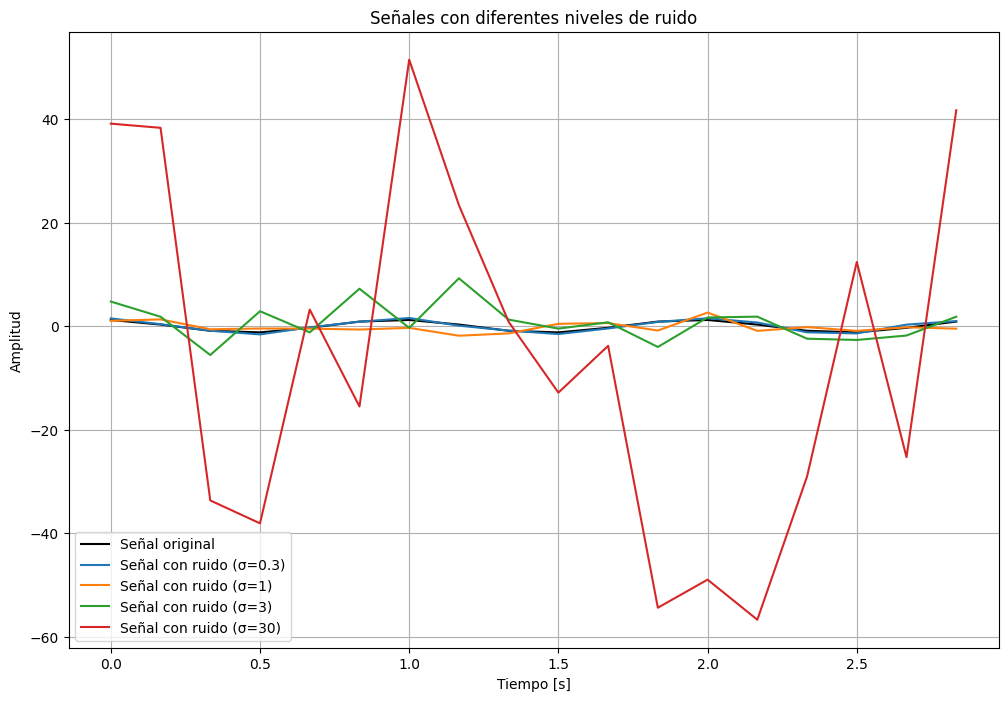

In [9]:


# Crear matriz para las señales con ruido
signals_matrix = np.zeros((len(noise_levels) + 1, len(t)))
signals_matrix[0, :] = original_signal

# Añadir ruido y almacenar en la matriz
for i, noise_level in enumerate(noise_levels):
    noisy_signal = original_signal + np.random.normal(0, noise_level, original_signal.shape)
    signals_matrix[i + 1, :] = noisy_signal

# Graficar todas las señales en el mismo gráfico
plt.figure(figsize=(12, 8))
plt.plot(t, signals_matrix[0, :], label='Señal original', color='black')
for i, noise_level in enumerate(noise_levels):
    plt.plot(t, signals_matrix[i + 1, :], label=f'Señal con ruido (σ={noise_level})')

plt.title("Señales con diferentes niveles de ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-22-20f16b76f689>:26: UserWarning: nperseg = 256 is greater than input length  = 18, using nperseg = 18
  frequencies, times, Sxx = spectrogram(selected_signal, fs)


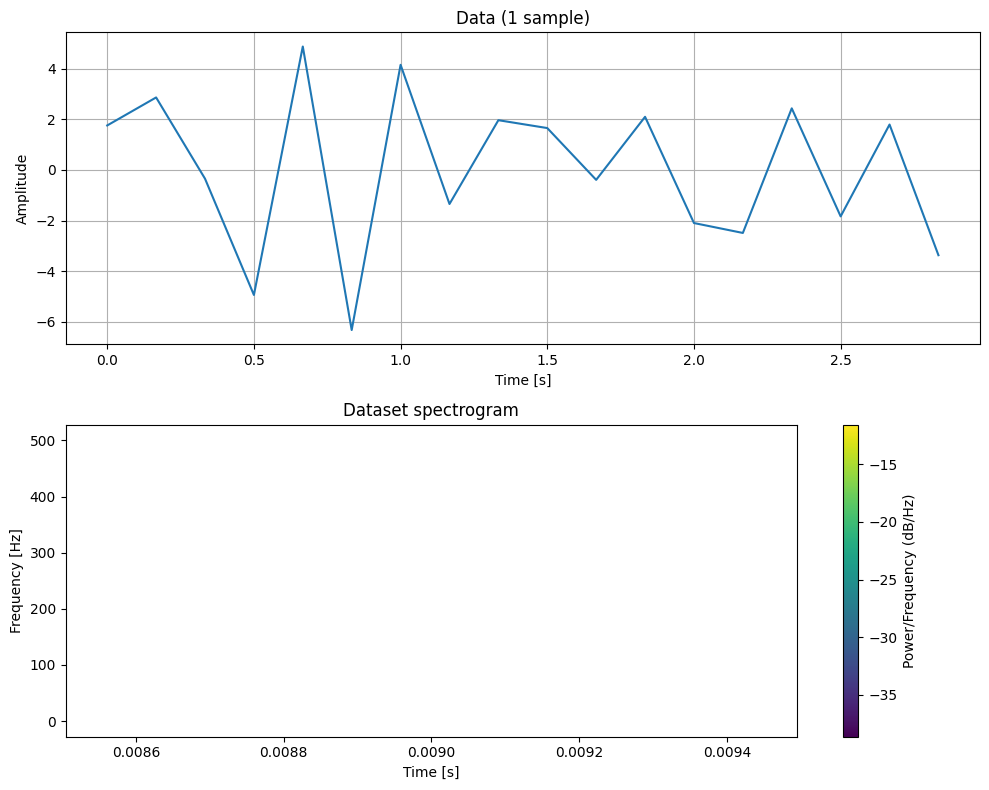

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Asegúrate de que estos valores estén definidos
# signals_matrix = la matriz de señales con ruido
# fs = frecuencia de muestreo
# t = vector de tiempo

# Selecciona una señal del dataset (puedes cambiar el índice)
signal_index = 3  # Cambia este valor para seleccionar diferentes señales
selected_signal = signals_matrix[signal_index, :]

# Graficar la señal de tiempo
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, selected_signal)
plt.title(f"Data (1 sample)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Calcular y graficar el espectrograma
plt.subplot(2, 1, 2)
frequencies, times, Sxx = spectrogram(selected_signal, fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Dataset spectrogram')

plt.tight_layout()
plt.show()


### Aplica Welch

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 18, using nperseg = 18
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Matriz de PSDs:
[[1.21737794e-33 7.57062301e-32 3.87777778e-01 1.55111111e+00
  3.87777778e-01 1.23107344e-31 1.29042062e-31 9.89119576e-33
  9.37821253e-32 1.47302731e-31]
 [1.75203899e-02 8.66099598e-02 3.27362312e-01 1.72446489e+00
  4.25986458e-01 6.13236808e-04 2.42017479e-02 1.39149333e-02
  1.00692523e-02 9.27791424e-03]
 [1.08787085e-02 4.76379632e-01 1.06519531e+00 3.62876532e+00
  2.76735470e+00 5.34653129e-01 1.37699542e-01 2.83466934e-01
  2.77522717e-01 1.77672457e-05]
 [3.16413654e-01 2.90684009e+00 2.13718011e+00 6.00143077e-01
  2.56916151e+00 4.76618210e-01 1.06776827e+00 6.25865750e+00
  7.68863131e+00 5.70227690e-02]
 [8.51009779e+01 7.53843228e+02 4.79327189e+02 1.19139778e+03
  1.17412555e+03 1.03853631e+03 1.70954182e+03 2.77793791e+02
  6.51474489e+00 1.84323493e+01]]


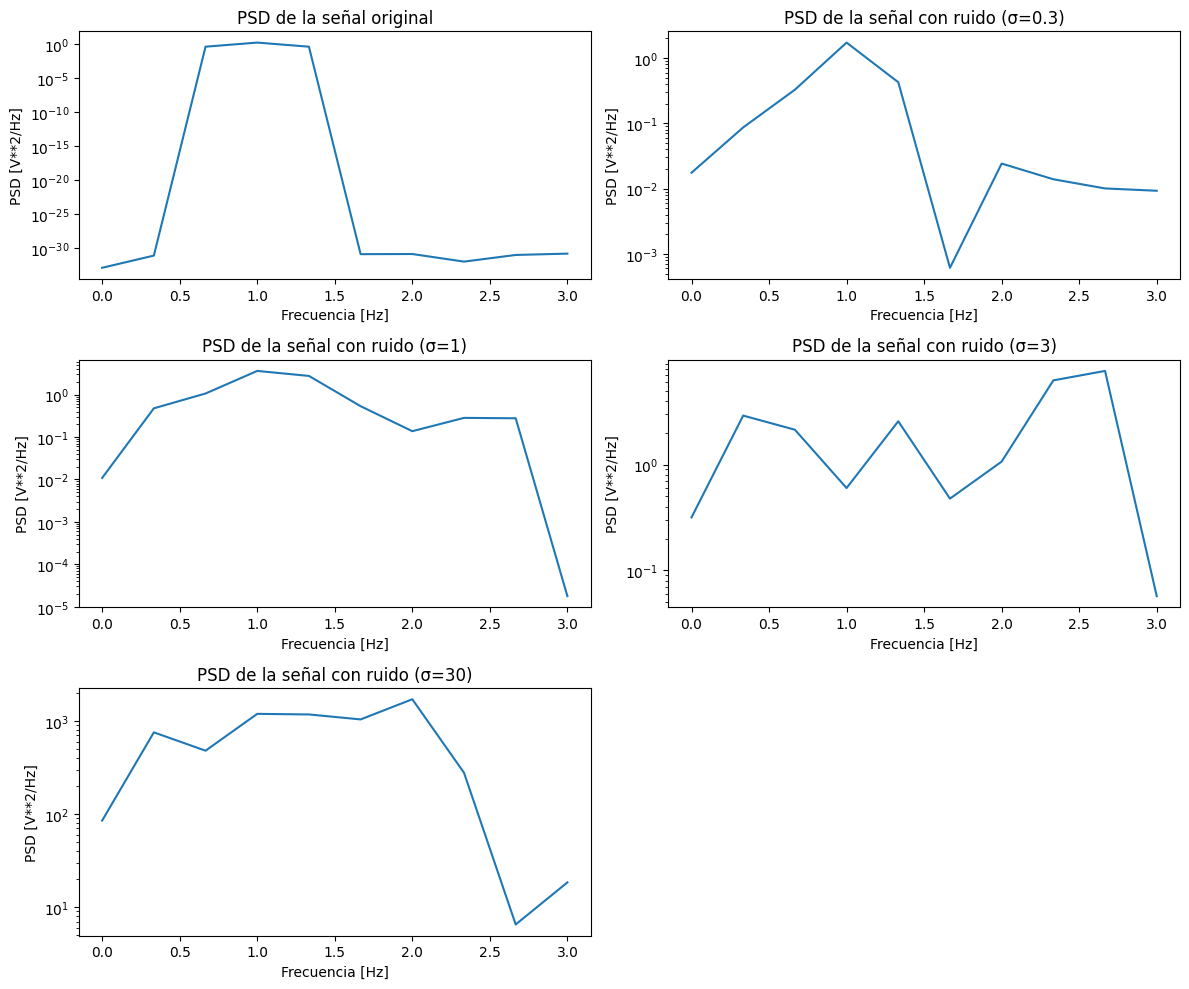

(5, 10)


In [4]:
psd_matrix = []
frequencies = None

for i in range(signals_matrix.shape[0]):
    f, Pxx = welch(signals_matrix[i, :], fs, nperseg=1024)
    if frequencies is None:
        frequencies = f
    psd_matrix.append(Pxx)

psd_matrix = np.array(psd_matrix)

# Imprimir la matriz de PSDs
print("Matriz de PSDs:")
print(psd_matrix)

# Graficar la PSD utilizando el método de Welch
plt.figure(figsize=(12, 10))
for i in range(psd_matrix.shape[0]):
    plt.subplot(3, 2, i + 1)
    plt.semilogy(frequencies, psd_matrix[i, :])
    if i == 0:
        plt.title("PSD de la señal original")
    else:
        plt.title(f"PSD de la señal con ruido (σ={noise_levels[i-1]})")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("PSD [V**2/Hz]")

plt.tight_layout()
plt.show()

print (psd_matrix.shape)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 18, using nperseg = 18
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Matriz de PSDs:
[[1.21737794e-33 7.57062301e-32 3.87777778e-01 1.55111111e+00
  3.87777778e-01 1.23107344e-31 1.29042062e-31 9.89119576e-33
  9.37821253e-32 1.47302731e-31]
 [4.03501315e-03 1.07425205e-02 6.11265262e-01 2.15265869e+00
  4.42331499e-01 1.76221796e-02 2.27278547e-03 7.76002510e-03
  2.97948465e-02 2.08644214e-02]
 [2.14028919e-02 4.58013663e-01 8.03086244e-01 3.14420937e-01
  6.12606819e-02 5.31055759e-01 8.33855902e-01 4.88233136e-01
  4.22494743e-01 3.42956206e-01]
 [1.98360798e-01 6.46989913e+00 5.91701518e+00 4.61278874e+00
  1.53759117e+00 4.30383740e-02 3.87529364e+00 9.59709468e+00
  8.06513789e+00 2.00991815e+00]
 [6.48064569e+01 9.18983934e+02 1.18489281e+03 4.44946545e+01
  1.66150223e+02 1.26725994e+02 1.43415713e+02 4.76687638e+01
  1.27205952e+02 1.14289630e+02]]


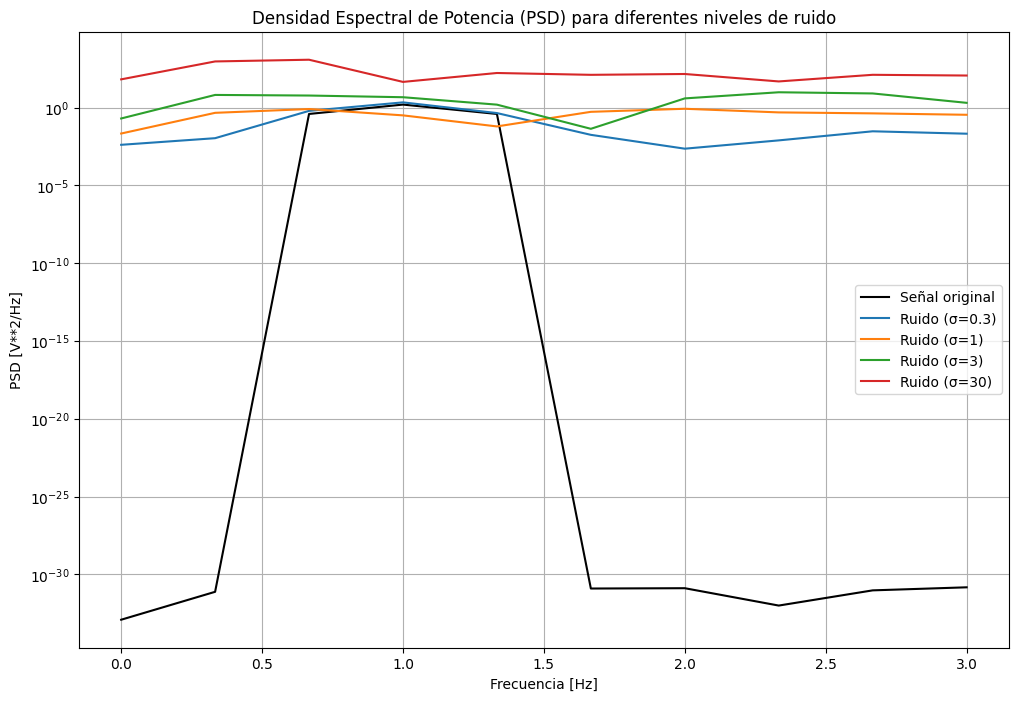

(5, 10)


In [10]:
psd_matrix = []
frequencies = None

for i in range(signals_matrix.shape[0]):
    f, Pxx = welch(signals_matrix[i, :], fs, nperseg=1024)
    if frequencies is None:
        frequencies = f
    psd_matrix.append(Pxx)

psd_matrix = np.array(psd_matrix)

# Imprimir la matriz de PSDs
print("Matriz de PSDs:")
print(psd_matrix)

# Graficar todas las PSDs en el mismo gráfico
plt.figure(figsize=(12, 8))
plt.semilogy(frequencies, psd_matrix[0, :], label='Señal original', color='black')
for i in range(1, psd_matrix.shape[0]):
    plt.semilogy(frequencies, psd_matrix[i, :], label=f'Ruido (σ={noise_levels[i-1]})')

plt.title("Densidad Espectral de Potencia (PSD) para diferentes niveles de ruido")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [V**2/Hz]")
plt.legend()
plt.grid(True)
plt.show()

print(psd_matrix.shape)

### Separa los datos de entrenamiento


In [5]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(signals_matrix, psd_matrix, test_size=0.2, random_state=42)

# Imprimir los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento (X_train):")
print(X_train)
print("Conjunto de prueba (X_test):")
print(X_test)
print("Etiquetas de entrenamiento (y_train):")
print(y_train)
print("Etiquetas de prueba (y_test):")
print(y_test)


Conjunto de entrenamiento (X_train):
[[-6.22236715e+00 -2.67687794e+01  4.71511951e+01 -1.29808647e+01
   7.75127836e+01  1.96225571e+01 -8.09028453e+01  1.55042954e+01
   6.36214975e+01 -3.70802745e+01 -3.95863543e+01 -4.53171635e+01
  -6.52936993e+01 -1.10507945e+01  3.38352332e+01 -1.80475555e+01
  -3.39462457e+01  2.75759928e+01]
 [ 1.09046020e+00 -4.06160800e-01 -1.13306550e+00 -5.91104972e-01
  -5.09056789e-02  5.70407202e-01  2.33900121e+00  1.73929004e+00
   6.23222520e-02 -3.20008325e+00 -1.42209707e+00  1.36025749e+00
   5.90594845e-01  1.91657096e-01 -2.68286646e+00 -6.38697631e-01
   6.19054616e-01  1.69819296e+00]
 [ 1.20000000e+00  3.11324865e-01 -8.88675135e-01 -1.20000000e+00
  -3.11324865e-01  8.88675135e-01  1.20000000e+00  3.11324865e-01
  -8.88675135e-01 -1.20000000e+00 -3.11324865e-01  8.88675135e-01
   1.20000000e+00  3.11324865e-01 -8.88675135e-01 -1.20000000e+00
  -3.11324865e-01  8.88675135e-01]
 [-3.47450429e+00  2.64811043e+00  2.32290092e+00 -9.26128178e-01


Epoch 1/100, Loss: 192818.453125, Val Loss: 192362.5
Epoch 2/100, Loss: 192362.5, Val Loss: 191966.84375
Epoch 3/100, Loss: 191966.828125, Val Loss: 191590.71875
Epoch 4/100, Loss: 191590.71875, Val Loss: 191226.203125
Epoch 5/100, Loss: 191226.203125, Val Loss: 190878.515625
Epoch 6/100, Loss: 190878.515625, Val Loss: 190543.3125
Epoch 7/100, Loss: 190543.296875, Val Loss: 190202.296875
Epoch 8/100, Loss: 190202.28125, Val Loss: 189859.5625
Epoch 9/100, Loss: 189859.578125, Val Loss: 189544.671875
Epoch 10/100, Loss: 189544.65625, Val Loss: 189216.28125
Epoch 11/100, Loss: 189216.265625, Val Loss: 188871.28125
Epoch 12/100, Loss: 188871.28125, Val Loss: 188509.90625
Epoch 13/100, Loss: 188509.9375, Val Loss: 188112.5
Epoch 14/100, Loss: 188112.5, Val Loss: 187683.375
Epoch 15/100, Loss: 187683.375, Val Loss: 187222.78125
Epoch 16/100, Loss: 187222.796875, Val Loss: 186730.359375
Epoch 17/100, Loss: 186730.34375, Val Loss: 186194.03125
Epoch 18/100, Loss: 186194.046875, Val Loss: 18560

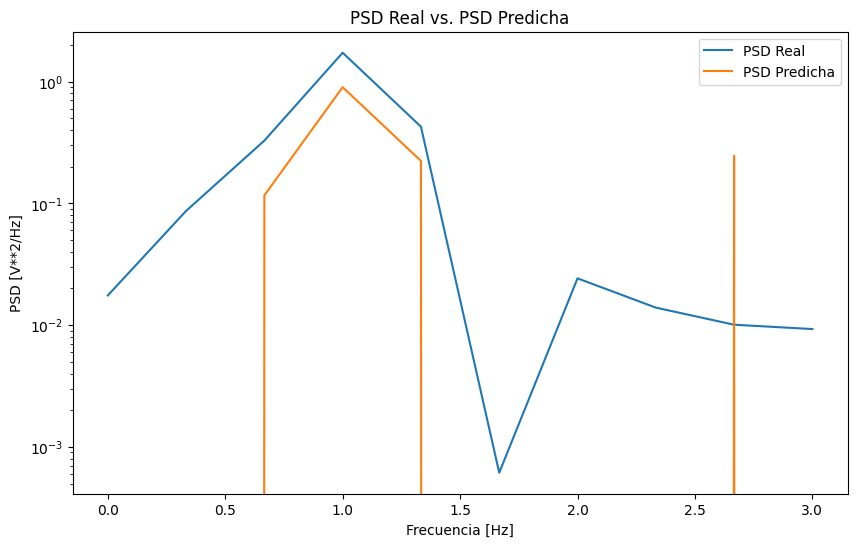

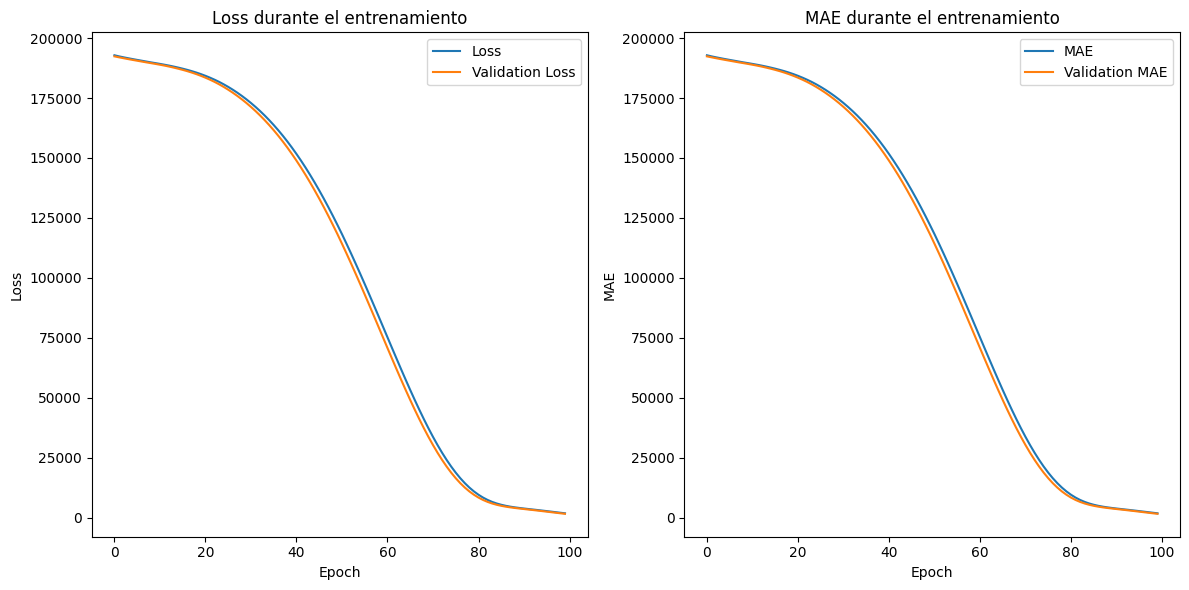

In [7]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, y_train.shape[1])

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss.append(running_loss / len(train_loader))

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_train_tensor)
        val_loss_epoch = criterion(val_outputs, y_train_tensor).item()
        val_loss.append(val_loss_epoch)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Val Loss: {val_loss_epoch}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

# Plot the real vs. predicted PSD for a test signal
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, y_test[0], label='PSD Real')
plt.semilogy(frequencies, y_pred[0], label='PSD Predicha')
plt.title('PSD Real vs. PSD Predicha')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

# Plot training metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='MAE')  # Note: MAE is not directly tracked here, using loss as a proxy
plt.plot(val_loss, label='Validation MAE')  # Note: MAE is not directly tracked here, using loss as a proxy
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()